In [6]:
import importlib

import dcor
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import sklearn.cross_decomposition
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction.projection import FPCA
from tqdm.notebook import tqdm

from Preprocessing.mRMR.mRMR import calculate_mRMR_skfda
from Utils import common_functions, fixed_values, paths, plot_utils

In [2]:
xlabel_font_size = 20
both_ticks_label_size = 15
legend_font_size = 15

COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

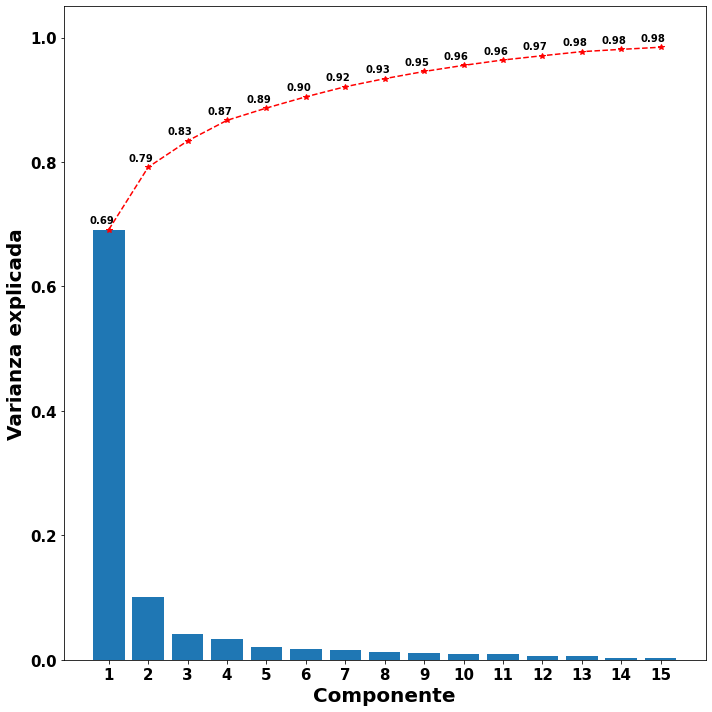

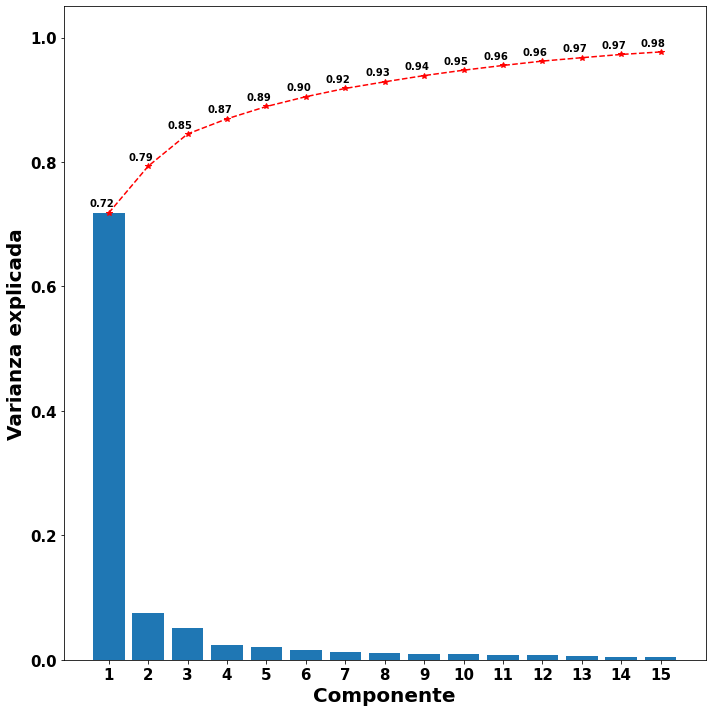

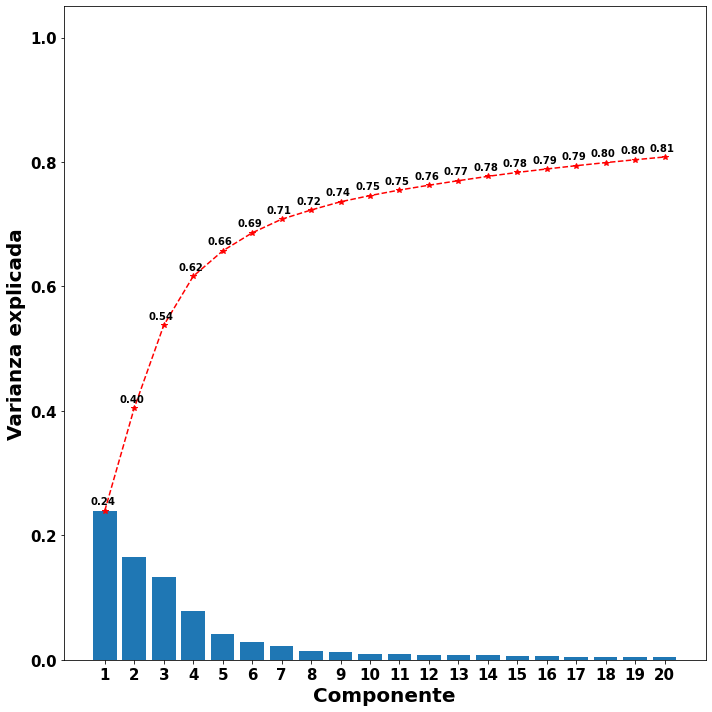

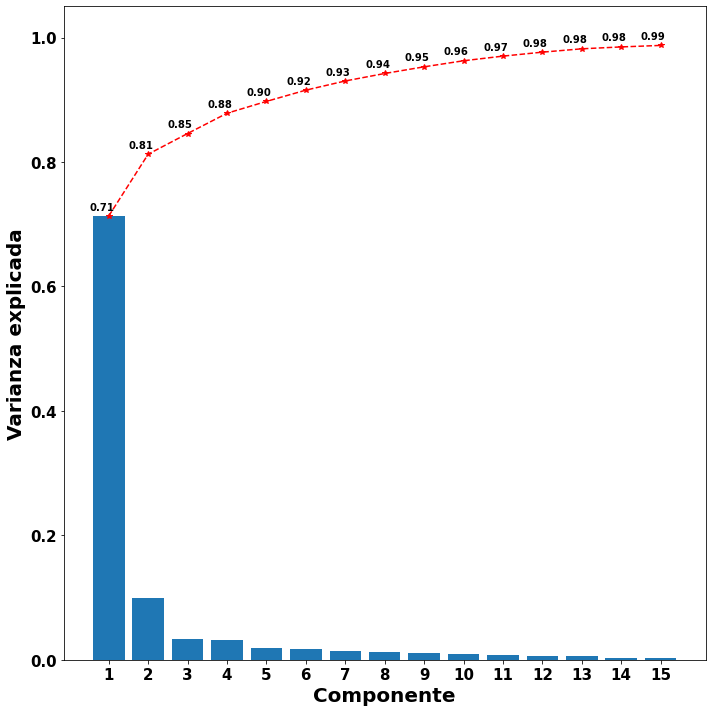

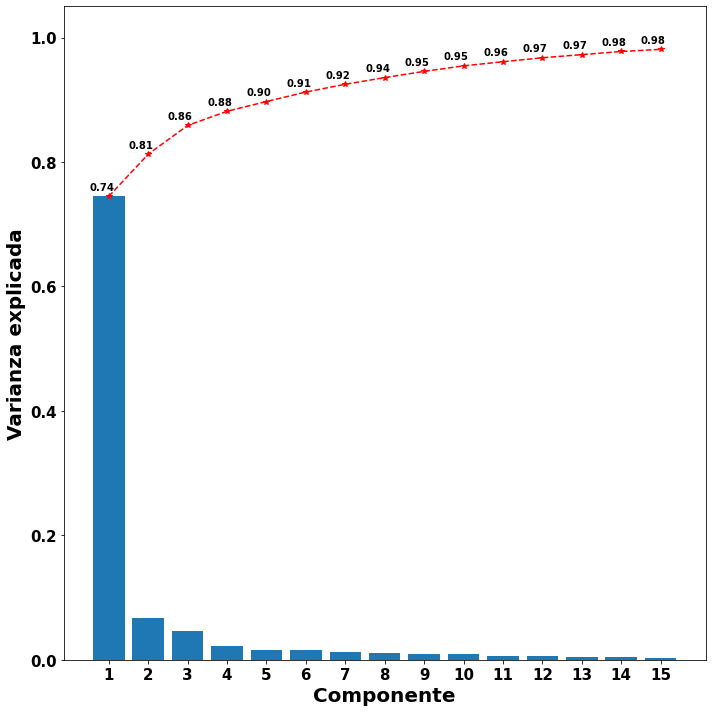

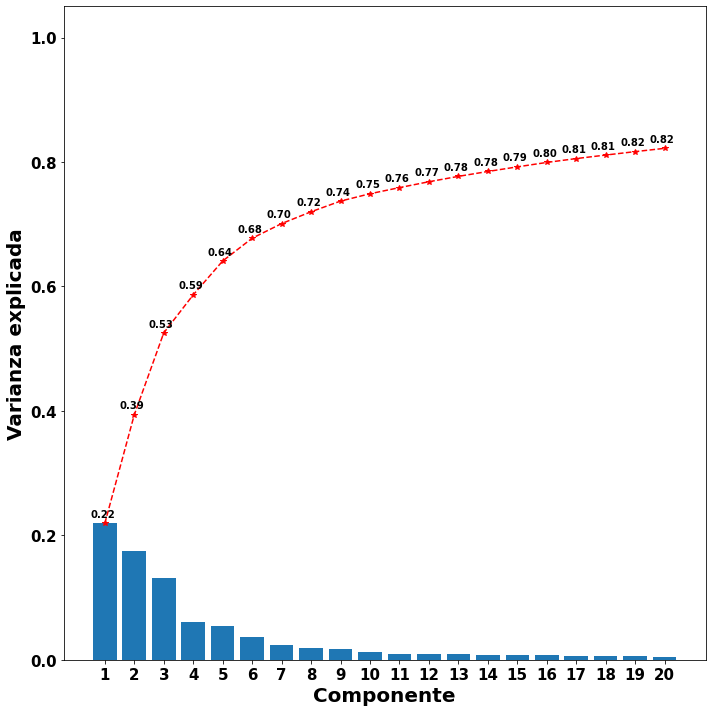

In [327]:
fpca_d = {}
for filter_set in ['base', 'filtered']:
    for dataset in fixed_values.DATASETS:
        tt, X, y = common_functions.load_data(dataset,
                                              remove_outliers=False,
                                              filter_data=filter_set == 'filtered',
                                              easy_data=False)

        X_fd = FDataGrid(data_matrix=X.values, grid_points=tt)
        fpca = FPCA(n_components=100)
        fpca = fpca.fit(X_fd)
        fpca_d[dataset] = fpca
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        if dataset != 'FFT':
            n_components = 15
        else:
            n_components = 20

        ax.bar([_ + 1 for _ in range(n_components)], fpca.explained_variance_ratio_[:n_components])
        ax.plot([_ + 1 for _ in range(n_components)], np.cumsum(fpca.explained_variance_ratio_[:n_components]), '*--',
                color='red')
        x = [_ + 1 for _ in range(n_components)]
        y_bar = np.cumsum(fpca.explained_variance_ratio_[:n_components])
        text = [f"{v:.2f}" for v in y_bar]
        for i in range(len(x)):
            plt.annotate(text[i], (x[i] - 0.5, y_bar[i] + 0.01))
        ax.set_ylim((0, 1.05))
        ax.set_ylabel('Varianza explicada', fontsize=xlabel_font_size)
        ax.set_xlabel('Componente', fontsize=xlabel_font_size)
        ax.set_xticks([_ + 1 for _ in range(n_components)])
        ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)

        fig.tight_layout()

        plt.savefig(f'{paths.PLOTS_MEMORIA_PATH}/4_2_{filter_set}_scree_plot_{dataset}.pdf')

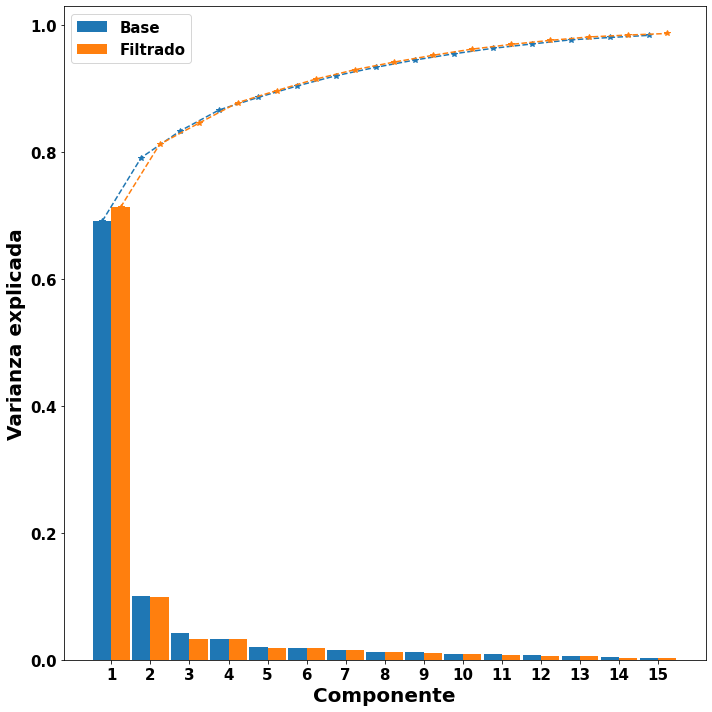

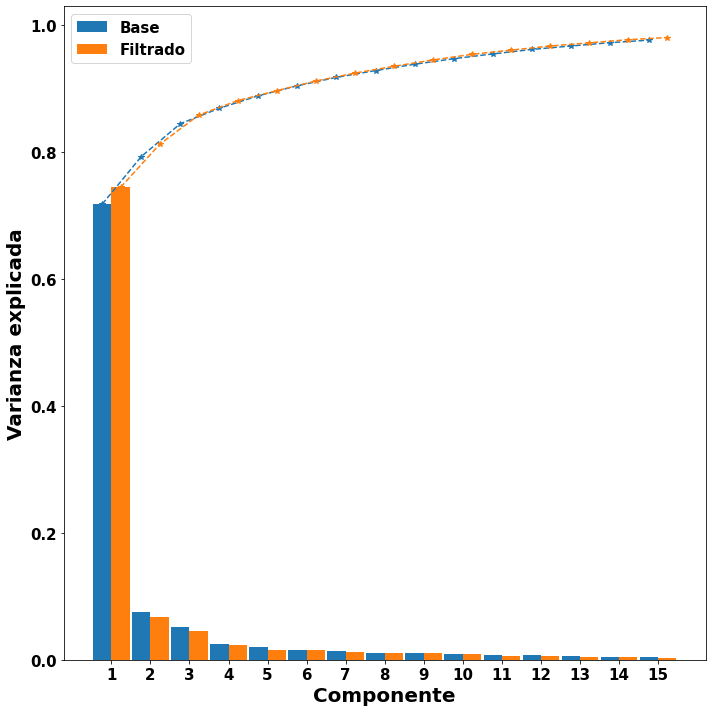

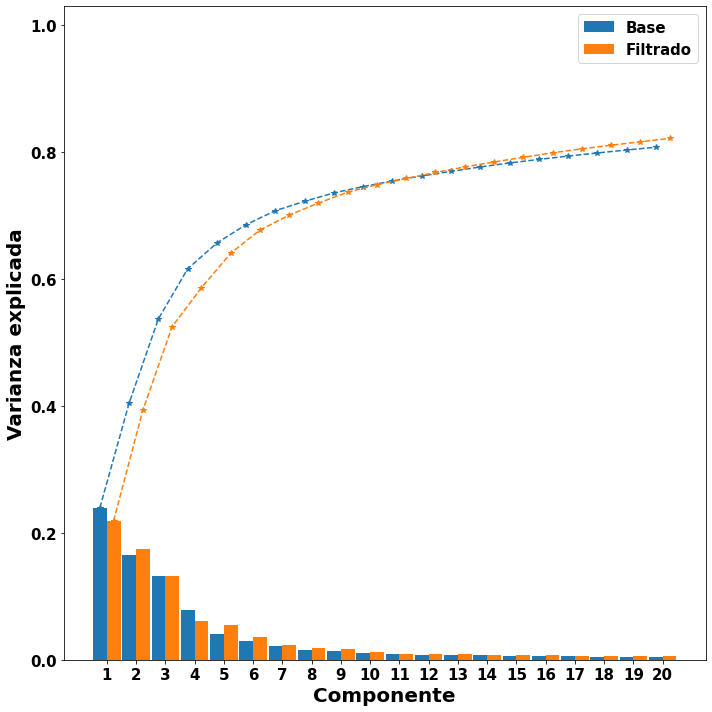

In [328]:

for dataset in fixed_values.DATASETS:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    for i, filter_set in enumerate(['Base', 'Filtrado']):
        tt, X, y = common_functions.load_data(dataset,
                                              remove_outliers=False,
                                              filter_data=filter_set == 'Filtrado',
                                              easy_data=False)

        X_fd = FDataGrid(data_matrix=X.values, grid_points=tt)
        fpca = FPCA(n_components=100)
        fpca = fpca.fit(X_fd)
        fpca_d[f"{filter_set}_{dataset}"] = fpca

        if dataset != 'FFT':
            n_components = 15
        else:
            n_components = 20
        width = 0.47
        x = (np.arange(n_components) + 1) + i * width
        ax.bar(x , fpca.explained_variance_ratio_[:n_components], width=width,
               label=filter_set,
               color=COLORS[0] if filter_set == 'Base' else COLORS[1])
        ax.plot(x, np.cumsum(fpca.explained_variance_ratio_[:n_components]),
                '*--',
                color=COLORS[0] if filter_set == 'Base' else COLORS[1])
        # x = [_ + 1 for _ in range(n_components)]
        # y_bar = np.cumsum(fpca.explained_variance_ratio_[:n_components])
        # text = [f"{v:.2f}" for v in y_bar]
        # for i in range(len(x)):
        #     plt.annotate(text[i], (x[i] - 0.5, y_bar[i] + 0.01))
        ax.set_ylim((0, 1.03))
        ax.set_ylabel('Varianza explicada', fontsize=xlabel_font_size)
        ax.set_xlabel('Componente', fontsize=xlabel_font_size)
        ax.set_xticks([(_ + 1) + width / 2 for _ in range(n_components)])
        ax.set_xticklabels([(_ + 1) for _ in range(n_components)])
        ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)
        ax.legend(fontsize=legend_font_size)
    fig.tight_layout()
    plt.savefig(f'{paths.PLOTS_MEMORIA_PATH}/4_2_scree_plot_{dataset}.pdf')
plt.show()

In [311]:
base_results = pd.read_csv(f"{paths.RESULTS_PATH}/28_02_22_results_main_experiment.csv", sep=';')
base_results = base_results[base_results['PREPROCESS'] == 'PCA']
base_results = base_results.apply(lambda x: pd.to_numeric(x, errors='ignore'))

pd.pivot_table(base_results, values='FEATURES_NUMBER', index='DATASET', columns='CLASSIFIER_NAME',
               aggfunc=['mean', 'std'])

mean                                                \
CLASSIFIER_NAME   KNN KNNSScaler     LR LRSScaler    SVC SVCSScaler   
DATASET                                                               
CC               8.00       8.95  11.49       NaN  10.29       8.36   
DCOR             7.56      11.49  22.22       NaN   5.38       9.55   
FFT              8.18       5.95  13.67      19.0   1.06       9.64   

                       std                                              \
CLASSIFIER_NAME        KNN KNNSScaler         LR  LRSScaler        SVC   
DATASET                                                                  
CC               13.093294  14.912116  13.234097        NaN  17.804945   
DCOR             13.241593  11.347135  28.816935        NaN   6.400410   
FFT              11.318511   5.840256  25.265082  28.503765   0.238683   

                            
CLASSIFIER_NAME SVCSScaler  
DATASET                     
CC               13.851682  
DCOR             16.075815  
FFT              20.208269

In [312]:
base_results = pd.read_csv(f"{paths.RESULTS_PATH}/28_03_22_results_main_experiment_filtered.csv", sep=';')
base_results = base_results[base_results['PREPROCESS'] == 'PCA']
base_results = base_results.apply(lambda x: pd.to_numeric(x, errors='ignore'))

pd.pivot_table(base_results, values='FEATURES_NUMBER', index='DATASET', columns='CLASSIFIER_NAME',
                     aggfunc=['mean', 'std'])

mean                                                \
CLASSIFIER_NAME    KNN KNNSScaler     LR LRSScaler    SVC SVCSScaler   
DATASET                                                                
CC               11.77      20.94  13.93       NaN   8.17      12.36   
DCOR              5.67      37.44  33.11       NaN  14.87      21.15   
FFT              12.17       9.58  36.27     32.98   1.03      12.70   

                       std                                              \
CLASSIFIER_NAME        KNN KNNSScaler         LR  LRSScaler        SVC   
DATASET                                                                  
CC               14.973954  24.206110  15.179236        NaN   8.920587   
DCOR              7.995017  31.427749  28.121272        NaN  18.742085   
FFT              21.444811  14.616429  40.460445  38.910667   0.171447   

                            
CLASSIFIER_NAME SVCSScaler  
DATASET                     
CC               12.420674  
DCOR             21.108845  
FFT              23.046067

CC Base


  0%|          | 0/2399 [00:00<?, ?it/s]

CC Filtrado


  0%|          | 0/2399 [00:00<?, ?it/s]

DCOR Base


  0%|          | 0/2399 [00:00<?, ?it/s]

DCOR Filtrado


  0%|          | 0/2399 [00:00<?, ?it/s]

FFT Base


  0%|          | 0/540 [00:00<?, ?it/s]

[0.0439800168192401, 0.0051635442824622775, 0.00023317118720429716, 0.02783557801277024, 0.003214252034029378]
FFT Filtrado


  0%|          | 0/540 [00:00<?, ?it/s]

[0.06697646413453505, 0.009842880967828883, 0.0668289473352908, 0.027987596528823173, -0.0012624701591036982]


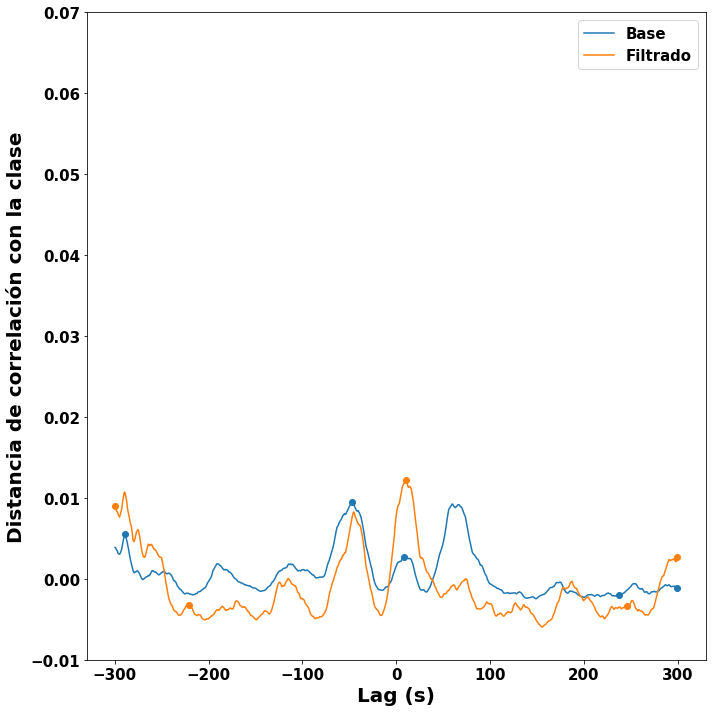

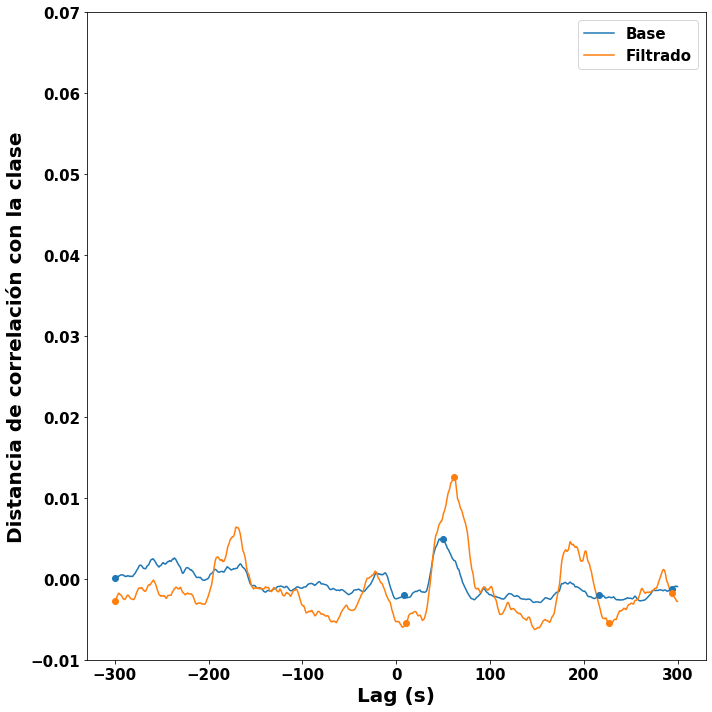

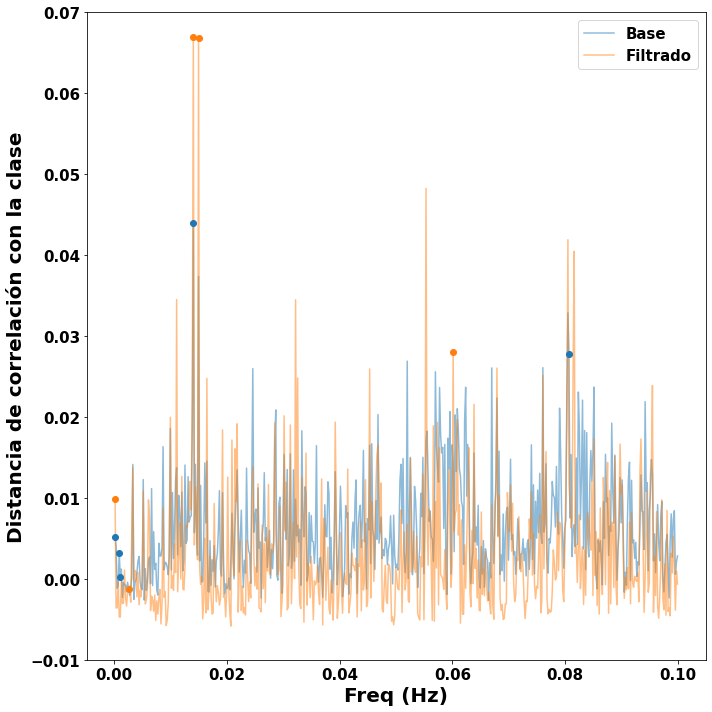

In [380]:
importlib.reload(plot_utils)



for dataset in ['CC', 'DCOR', 'FFT']:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    for i, filter_set in enumerate(['Base', 'Filtrado']):
        print(dataset, filter_set)
        tt, X, y = common_functions.load_data(dataset, filter_data=filter_set=='Filtrado')
        X_t = X.T
        y = y.astype('float')

        if dataset == 'FFT':
            X_t.index = X_t.index.astype('float64')
            candidates = tt.to_list()
        else:
            candidates = X_t.index.to_list()
        relevance_vector = dict()

        for idx in tqdm(candidates):
            row_vals = X_t.loc[idx]
            relevance_vector[idx] = dcor.u_distance_correlation_sqr(row_vals, y)

        sel_features = calculate_mRMR_skfda(X, tt, y, features_number=5)
        relevance_vector_sel = [relevance_vector[float(sel_feature)] for sel_feature in sel_features]

        x_plot = np.array(list(relevance_vector.keys()), dtype='float64')
        if dataset != 'FFT':
            x_plot /= 4
            sel_features /= 4
        ax.plot(x_plot, relevance_vector.values(), label=filter_set, color=COLORS[i], zorder=i, alpha=0.5 if dataset == 'FFT' else 1)
        ax.scatter(sel_features, relevance_vector_sel, color=COLORS[i], zorder=3)
        ax.set_ylabel('Distancia de correlación con la clase', fontsize=xlabel_font_size)
        ax.set_xlabel('Lag (s)', fontsize=xlabel_font_size)
        if dataset == 'FFT':
            print(relevance_vector_sel)
            ax.set_xlabel("Freq (Hz)", fontsize=xlabel_font_size)
        ax.set_ylim((-0.01, 0.07))
        ax.tick_params(axis='both', which='major', labelsize=both_ticks_label_size)
        ax.legend(fontsize=legend_font_size)
    fig.tight_layout()
    fig.savefig(f"{paths.PLOTS_MEMORIA_PATH}/4_2_{dataset}_relevance_plot.pdf")

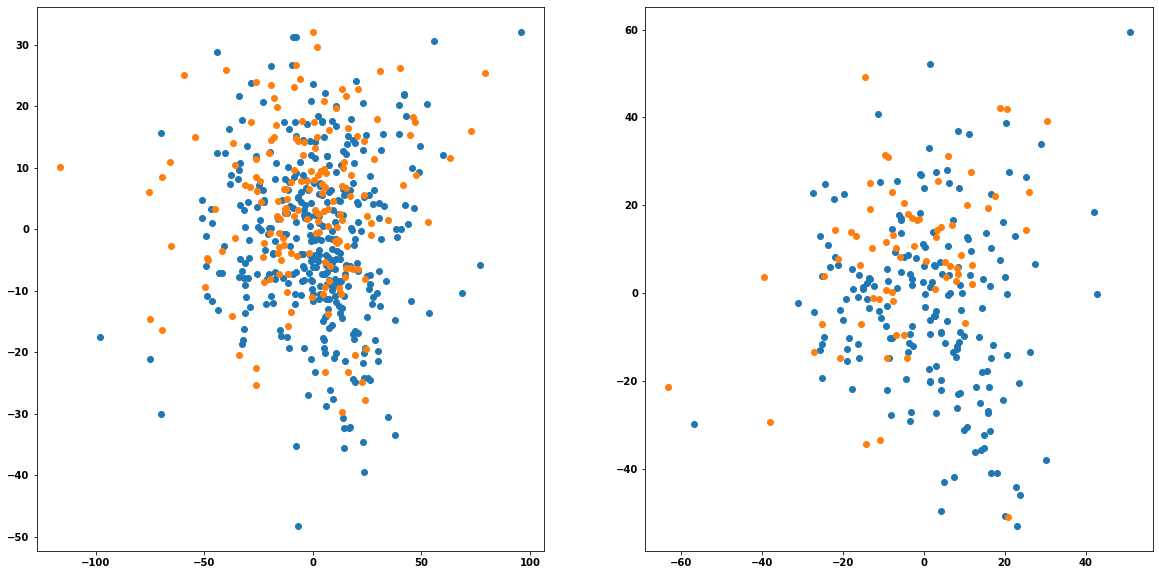

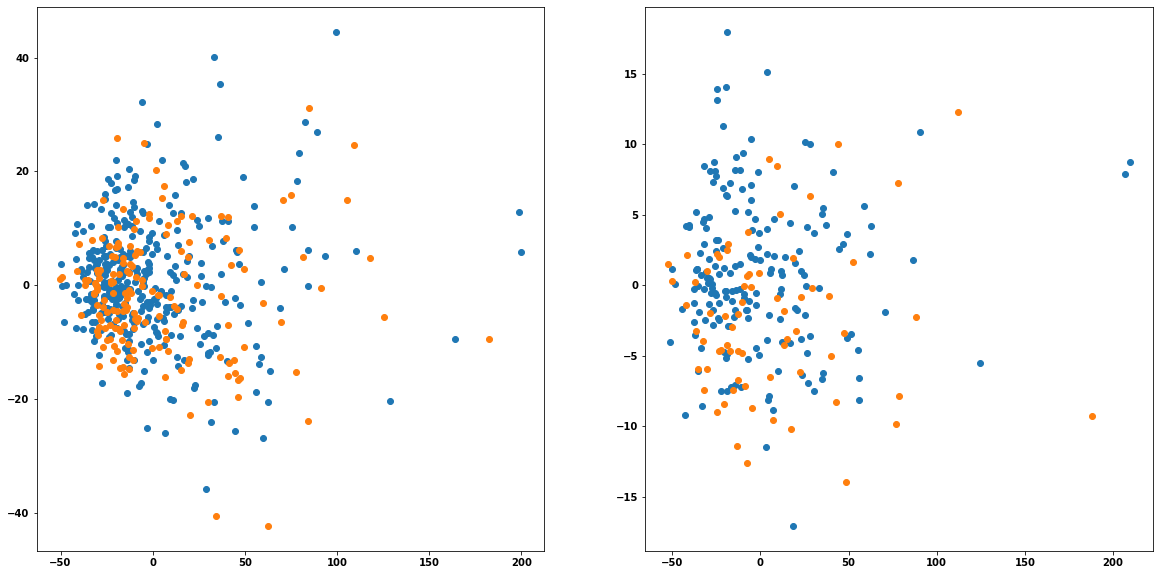

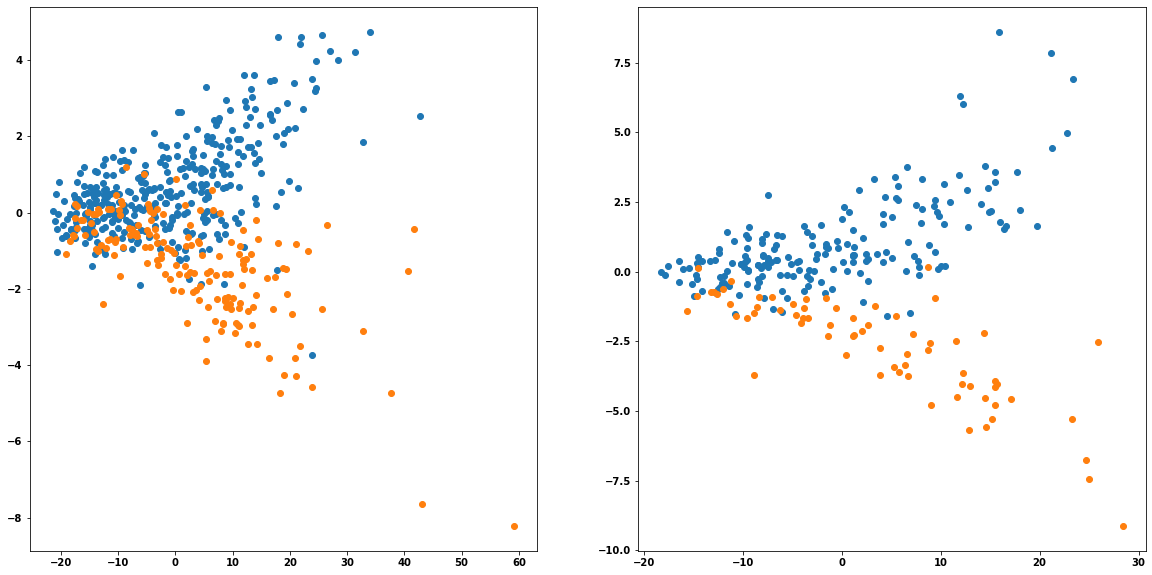

In [38]:
for dataset in fixed_values.DATASETS:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    for i, filter_set in enumerate(['Base', 'Filtrado']):
        tt, X, y = common_functions.load_data(dataset,
                                              remove_outliers=False,
                                              filter_data=filter_set == 'Filtrado',
                                              easy_data=False)
        y = y.iloc[:]

        pls_regressor = sklearn.cross_decomposition.PLSRegression(n_components=2)
        pls_regressor = pls_regressor.fit(X, y)

        X_pls = pls_regressor.transform(X)
        ax[i].scatter(X_pls[y == 0][:, 0], X_pls[y == 0][:, 1], label='Normal')
        ax[i].scatter(X_pls[y == 1][:, 0], X_pls[y == 1][:, 1], label='Patológico')